In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

np.set_printoptions(suppress=True)

def show_colour_and_grey_image(img_index):
    colour_img = cv2.cvtColor(imArr[img_index], cv2.COLOR_BGR2RGB)
    grey_img = grArr[img_index]
    fig = plt.figure()
    ax0 = fig.add_subplot(121)
    ax0.axis("off")
    ax0.imshow(colour_img)
    ax1 = fig.add_subplot(122)
    ax1.axis("off")
    ax1.imshow(grey_img, cmap='gray')
    plt.show()

# show_colour_and_grey_image(1)
# show_colour_and_grey_image(8)

def gen_features(gray_img, alg):
    obj = cv2.xfeatures2d.SIFT_create()
    if(alg == "SURF"):
        obj = cv2.xfeatures2d.SURF_create()
    # kp is the keypoints
    #
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp, desc = obj.detectAndCompute(gray_img, None)
    return kp, desc

def show_features(gray_img, color_img, kp):
    plt.figure()
    plt.axis("off")
    plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))
    plt.show()
    
def show_matching_features(img1_data, img2_data):
    # create a BFMatcher object which will match up the SIFT features
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    matches = bf.match(img1_data[3], img2_data[3])

    # Sort the matches in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)

    # draw the top N matches
    N_MATCHES = 100

    match_img = cv2.drawMatches(
        img1_data[0], img1_data[2],
        img2_data[0], img2_data[2],
        matches[:N_MATCHES], img2_data[0].copy(), flags=0)

    plt.figure(figsize=(12,6))
    plt.imshow(match_img);
    plt.show()


def explain_keypoint(kp):
    print 'angle\n', kp.angle
    print '\nclass_id\n', kp.class_id
    print '\noctave (image scale where feature is strongest)\n', kp.octave
    print '\npt (x,y)\n', kp.pt
    print '\nresponse\n', kp.response
    print '\nsize\n', kp.size
    
def extract_kp_data(kp):
    return [kp.angle, kp.class_id, kp.octave, kp.pt[0], kp.pt[1], kp.response, kp.size]

def combine_kp_and_desc(kp, desc):
    kp_data = extract_kp_data(kp)
    return np.concatenate((kp_data, desc))

def readImagesCreateFeatures(num, readpath, savepath, alg, save):
    img_data_array = []
    if(alg == "Both"):
        num *= 2
    for i in range(num):
        algo = alg
        rpath = readpath
        spath = savepath
        if(alg == "Both"):
            if(i < num/2):
                algo = "SIFT"
                spath += "_SIFT"
            else:
                algo = "SURF"
                spath+= "_SURF"
        if((alg=="Both" and num>2) or (alg!="Both" and num > 1)):
            addNum = str(i+1)
            rpath += addNum + ").jpg"
            spath += "_" + addNum
        print(rpath)
        image = cv2.imread(rpath)
        grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        kp, desc = gen_features(grey, algo)
        if(num == 1):
            img_data_array = [image, grey, kp, desc]
        else:
            img_data_array.append([image, grey, kp, desc])
        if(save):
            np.save(spath, desc)
    return img_data_array

In [5]:
sunset_data_SURF = readImagesCreateFeatures(13, "../images/sunsets/resized/sunset (", "./numpy vectors/sunset_vectors/sunset_SURF", alg = "SURF", save = False)
sunset_data_SIFT = readImagesCreateFeatures(13, "../images/sunsets/resized/sunset (", "./numpy vectors/sunset_vectors/sunset_SIFT", alg="SIFT", save=False)
dog_data_SURF = readImagesCreateFeatures(13, "../images/dogs/resized/dog (", "./numpy vectors/dog_vectors/dog_SURF", alg="SURF", save=False)
dog_data_SIFT = readImagesCreateFeatures(13, "../images/dogs/resized/dog (", "./numpy vectors/dog_vectors/dog_SIFT", alg="SIFT", save=False)

../images/sunsets/resized/sunset (1).jpg
../images/sunsets/resized/sunset (2).jpg
../images/sunsets/resized/sunset (3).jpg
../images/sunsets/resized/sunset (4).jpg
../images/sunsets/resized/sunset (5).jpg
../images/sunsets/resized/sunset (6).jpg
../images/sunsets/resized/sunset (7).jpg
../images/sunsets/resized/sunset (8).jpg
../images/sunsets/resized/sunset (9).jpg
../images/sunsets/resized/sunset (10).jpg
../images/sunsets/resized/sunset (11).jpg
../images/sunsets/resized/sunset (12).jpg
../images/sunsets/resized/sunset (13).jpg
../images/sunsets/resized/sunset (1).jpg
../images/sunsets/resized/sunset (2).jpg
../images/sunsets/resized/sunset (3).jpg
../images/sunsets/resized/sunset (4).jpg
../images/sunsets/resized/sunset (5).jpg
../images/sunsets/resized/sunset (6).jpg
../images/sunsets/resized/sunset (7).jpg
../images/sunsets/resized/sunset (8).jpg
../images/sunsets/resized/sunset (9).jpg
../images/sunsets/resized/sunset (10).jpg
../images/sunsets/resized/sunset (11).jpg
../images/

In [13]:
# print(sunset_1_data[3][0])
# print()


# print len(sunset_1_data[2]), 'keypoints in the list'
# print sunset_1_data[2][0]

# print 'this is an example of a single SIFT keypoint:\n* * *'
# explain_keypoint(sunset_1_data[2][0])

plt.imshow(sunset_1_data[3][0].reshape(16,8), interpolation='none');
       
rotated_sunset_data = readImagesCreateFeatures(1, "../images/sunsets/resized/sunset (3) - upside.jpg", "./numpy vectors/vectors/sunset_rot_180", "SIFT")
original_sunset_data = readImagesCreateFeatures(1, "../images/sunsets/resized/sunset (3).jpg", "./numpy vectors/vectors/sunset_orig", "SIFT")

NameError: name 'sunset_1_data' is not defined

../images/sunsets/resized/sunset (3) - upside.jpg
../images/sunsets/resized/sunset (3).jpg


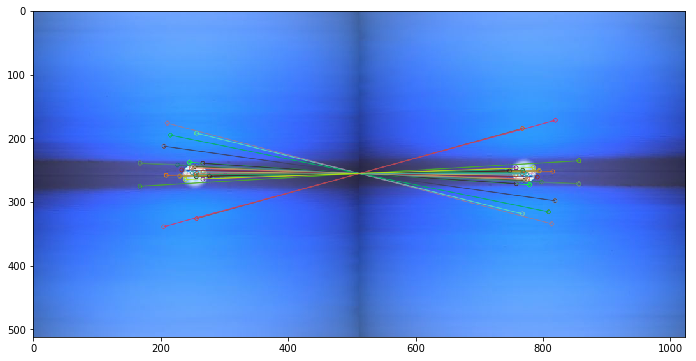

../images/sunsets/resized/sunset (1).jpg
../images/sunsets/resized/sunset (2).jpg
../images/sunsets/resized/sunset (3).jpg
../images/sunsets/resized/sunset (4).jpg
../images/sunsets/resized/sunset (5).jpg
../images/sunsets/resized/sunset (6).jpg
../images/sunsets/resized/sunset (7).jpg
../images/sunsets/resized/sunset (8).jpg
../images/sunsets/resized/sunset (9).jpg
../images/sunsets/resized/sunset (10).jpg
../images/sunsets/resized/sunset (11).jpg
../images/sunsets/resized/sunset (12).jpg
../images/sunsets/resized/sunset (13).jpg


In [10]:
rotated_sunset_SURF = readImagesCreateFeatures(1, "../images/sunsets/resized/sunset (3) - upside.jpg", "./numpy vectors/vectors/sunset_rot_SURF", "SURF")
original_sunset_SURF = readImagesCreateFeatures(1, "../images/sunsets/resized/sunset (3).jpg", "./numpy vectors/vectors/sunset_orig_SURF", "SURF")
show_matching_features(original_sunset_SURF, rotated_sunset_SURF)
sunset_3_SURF_line = readImagesCreateFeatures(1, "../images/sunsets/resized/sunset (3) line.jpg", "./numpy vectors/vectors/sunset_line_SURF", "SURF")
show_matching_features(original_sunset_SURF, sunset_3_SURF_line)

../images/sunsets/resized/sunset (6) crop.jpg
../images/sunsets/resized/sunset (6) crop.jpg


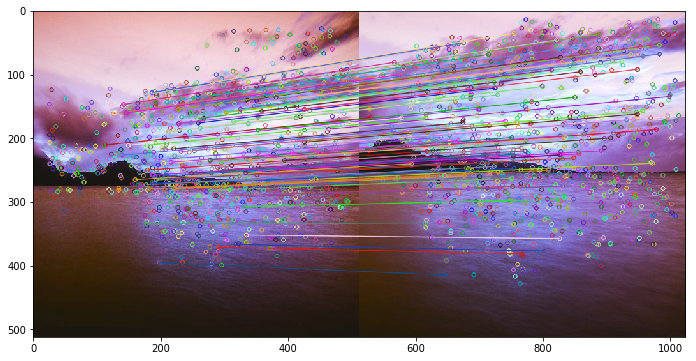

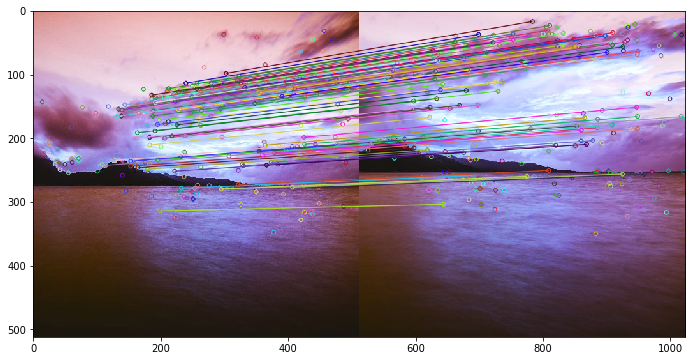

In [6]:
sunset_6_crop_SURF = readImagesCreateFeatures(1, "../images/sunsets/resized/sunset (6) crop.jpg", "./numpy vectors/vectors/sunset_6_crop_SURF", alg="SURF", save=True)
sunset_6_crop_SIFT = readImagesCreateFeatures(1, "../images/sunsets/resized/sunset (6) crop.jpg", "./numpy vectors/vectors/sunset_6_crop_SIFT", alg="SIFT", save=True)
show_matching_features(sunset_data_SURF[5], sunset_6_crop_SURF)
show_matching_features(sunset_data_SIFT[5], sunset_6_crop_SIFT)

../images/dogs/resized/dog (7) crop.jpg
../images/dogs/resized/dog (7) crop.jpg


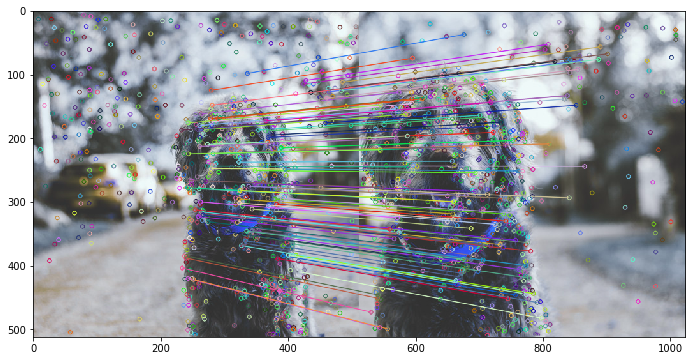

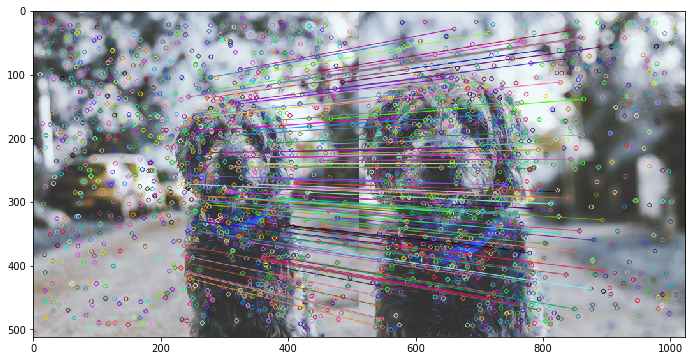

In [21]:
dog_7_crop_data = readImagesCreateFeatures(1, "../images/dogs/resized/dog (7) crop.jpg", "./numpy vectors/vectors/dog_6_crop", alg="Both", save=True)
show_matching_features(dog_data_SIFT[6], dog_7_crop_data[0])
show_matching_features(dog_data_SURF[6], dog_7_crop_data[1])